In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")
    sys.path.append(module_path+"\\References")


import data_preprocessing as dp
import metrics
import genetic_algorithm as ga

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, permutation_test_score, LeaveOneOut, KFold
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('/content/final_data.xlsx')
data.head()

,Unnamed: 0,Team size**1 x Actual duration**1,Dedicated team members**1 x Actual duration**1,Actual duration**1 x Development environment adequacy**1 x 11-20**1,Team size**1 x 21-30**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,User resistance**1 x Project manager**1 x 21-30**1,Development environment adequacy**1 x 21-30**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,Actual duration**1 x 21-30**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,Requirment stability**1 x 21-30**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,Dedicated team members**1 x Technical stability**1 x Tool availability**1,...,Dedicated team members**1 x Actual duration**1 x Economic instability impact**1,Technical stability**1 x 21-30**1 x Accurate requirements specifications used to develop the software system**1,Dedicated team members**1 x Actual duration**1 x Accurate requirements specifications used to develop the software system**1,Dedicated team members**1 x Users stability**1 x 1-5**1,Object points**1 x Project manager**1 x >500**1,Team size**1 x Developer**1 x >500**1,Dedicated team members**1 x Users stability**1 x Accurate requirements specifications used to develop the software system**1,Dedicated team members**1 x Team cohesion**1 x Developer incentives policy**1,Requirment stability**1 x Tool availability**1 x 11-20**1,Actual effort
0,0,18.0,18.0,0,0,0.0,0,0,0.0,42,...,18.0,0,18.0,0.0,0,6,11.333333,96,0.000000,3168.0
1,1,9.0,9.0,0,0,0.0,0,0,0.0,24,...,27.0,0,0.0,0.0,0,0,0.000000,108,0.000000,1584.0
2,2,30.0,30.0,0,0,0.0,0,0,0.0,48,...,60.0,0,0.0,0.0,0,0,0.000000,180,0.000000,5280.0
3,3,36.0,24.0,6,0,0.0,0,0,0.0,32,...,24.0,0,24.0,0.0,0,0,20.000000,16,10.031746,5280.0
4,4,216.0,216.0,24,0,0.0,0,0,0.0,36,...,648.0,0,216.0,0.0,0,0,17.000000,54,18.603175,38016.0


In [4]:
target = data['Actual effort']
X = data.drop(['Unnamed: 0', 'Actual effort'], axis = 1)

# Linear Regression Model

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state = 24)

In [7]:
X_train, X_test = pd.DataFrame(X_train, columns = X.columns), pd.DataFrame(X_test, columns = X.columns)

In [8]:
scaler, X_train = dp.scaling_numerical_data(X_train.columns, X_train)
X_test = scaler.transform(X_test)

## Cross Validation score

In [9]:
mmre = make_scorer(metrics.mean_magnitude_of_relative_error)
mae = make_scorer(metrics.mean_absolute_error)
pred = make_scorer(metrics.pred)
mre = make_scorer(metrics.magnitude_relative_error)

#### 10k fold cross validation

In [10]:
r2_ = cross_val_score(LinearRegression(), X_train, y_train, cv = KFold(10, shuffle=True, random_state = 37))
mae_ = cross_val_score(LinearRegression(), X_train, y_train, cv = KFold(10, shuffle=True, random_state = 37), scoring = mae)
mmre_ = np.abs(cross_val_score(LinearRegression(), X_train, y_train, cv = KFold(10, shuffle=True, random_state = 37), scoring = mmre))
pred_ = cross_val_score(LinearRegression(), X_train, y_train, cv = KFold(10, shuffle=True, random_state = 37), scoring = pred)

In [11]:
print('10k fold cross validation r2 score {}, std {}'.format(r2_.mean(), r2_.std()))
print('10k fold cross validation mean absolute error {}, std {}'.format(mae_.mean(), mae_.std()))
print('10k fold cross validation mean magnitude of relative error {}, std {}'.format(mmre_.mean(), mmre_.std()))
print('10k fold cross validation pred of 25% {}, std {}'.format(pred_.mean(), pred_.std()))

10k fold cross validation r2 score 0.9986009035865859, std 0.001196776756069102
10k fold cross validation mean absolute error 237.1158899755413, std 75.81909743050537
10k fold cross validation mean magnitude of relative error 0.07687417061914541, std 0.030022142451985832
10k fold cross validation pred of 25% 0.9152777777777779, std 0.07892262580652985


#### 5k fold cross validation

In [12]:
r2_ = cross_val_score(LinearRegression(), X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37))
mae_ = cross_val_score(LinearRegression(), X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = mae)
mmre_ = np.abs(cross_val_score(LinearRegression(), X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = mmre))
pred_ = cross_val_score(LinearRegression(), X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = pred)

In [13]:
print('5k fold cross validation r2 score {}, std {}'.format(r2_.mean(), r2_.std()))
print('5k fold cross validation mean absolute error {}, std {}'.format(mae_.mean(), mae_.std()))
print('5k fold cross validation mean magnitude of relative error {}, std {}'.format(mmre_.mean(), mmre_.std()))
print('5k fold cross validation pred of 25% {}, std {}'.format(pred_.mean(), pred_.std()))

5k fold cross validation r2 score 0.9986020359128975, std 0.0011962131077492741
5k fold cross validation mean absolute error 254.85638794555456, std 28.55416570665391
5k fold cross validation mean magnitude of relative error 0.08244755063219582, std 0.012766009369804694
5k fold cross validation pred of 25% 0.9154411764705882, std 0.051470588235294115


In [14]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_train, y_train), linear_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


(0.9998694172106698, 0.9938041389775555)

#### Metrics

In [15]:
train_predictions = linear_model.predict(X_train)
test_predictions = linear_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [16]:
metrics.scores_DataFrame(y_train, y_test, train_predictions, test_predictions)

,Train score,Test score
r2_score,0.999869,0.993804
MAE,112.204626,467.344054
MMRE,0.044356,0.106973
PRED (0.25),0.964286,0.833333


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


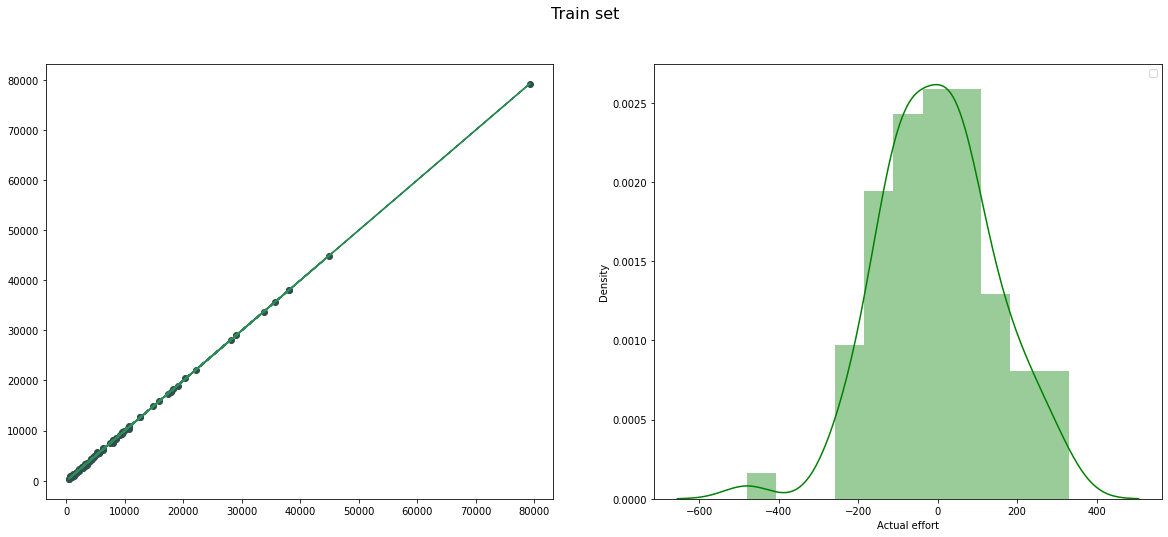

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


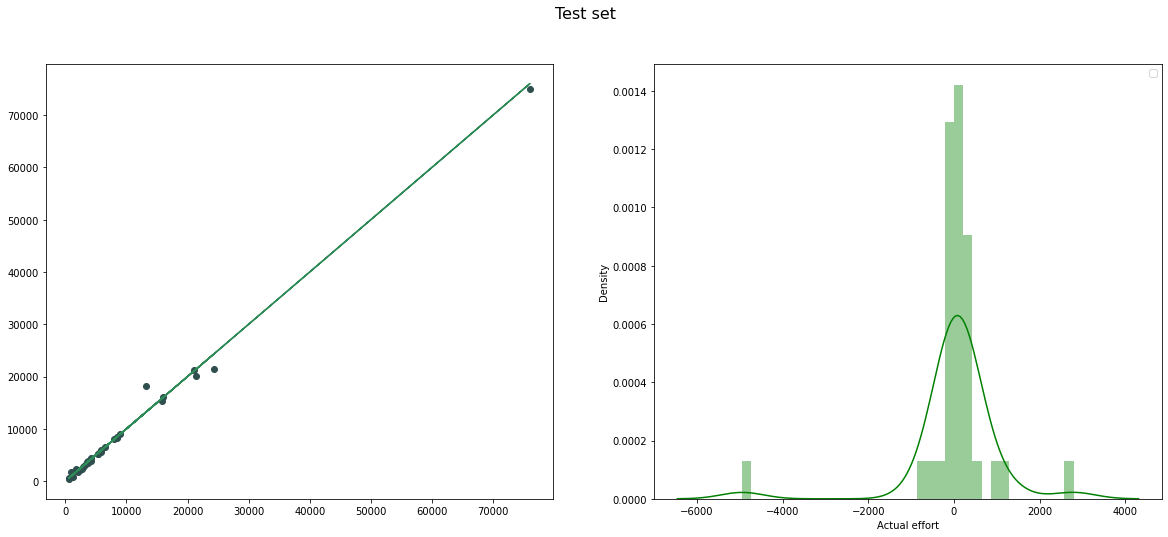

In [17]:
metrics.plot_predictions(y_train, train_predictions, (20, 8), 'Train set')
metrics.plot_predictions(y_test, test_predictions, (20, 8), 'Test set')

# Lasso
Optimize LinearRegression paramaters with GA-Algorithms

In [18]:
from sklearn.linear_model import Lasso

In [19]:
params = {'alpha': np.linspace(0, 2, 200), 'precompute': [True, False], 'selection': ['cyclic', 'random'], 
          'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
          'max_iter': [10, 100, 1000, 1000], 'positive': [False, True]}

In [20]:
optimizer = ga.GeneticAlgorithm(Lasso(random_state = 0), params, X_train, y_train, 6, 0.9999, 120)

In [ ]:
best_parameters = optimizer.evolution()

In [22]:
best_parameters[0]

{'alpha': 0.4321608040201005,
 'precompute': False,
 'selection': 'cyclic',
 'tol': 0.0001,
 'max_iter': 1000,
 'positive': False}

In [23]:
r2_ = cross_val_score(Lasso(**best_parameters[0], random_state = 0), X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37))
mae_ = cross_val_score(Lasso(**best_parameters[0], random_state = 0), X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = mae)
mmre_ = np.abs(cross_val_score(Lasso(**best_parameters[0], random_state = 0), X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = mmre))
pred_ = cross_val_score(Lasso(**best_parameters[0], random_state = 0), X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = pred)

In [24]:
print('5k fold cross validation r2 score {}, std {}'.format(r2_.mean(), r2_.std()))
print('5k fold cross validation mean absolute error {}, std {}'.format(mae_.mean(), mae_.std()))
print('5k fold cross validation mean magnitude of relative error {}, std {}'.format(mmre_.mean(), mmre_.std()))
print('5k fold cross validation pred of 25% {}, std {}'.format(pred_.mean(), pred_.std()))

5k fold cross validation r2 score 0.9987298795065623, std 0.0011172346781662384
5k fold cross validation mean absolute error 254.28437887401964, std 24.198016912017447
5k fold cross validation mean magnitude of relative error 0.08384922911736706, std 0.015155107178785042
5k fold cross validation pred of 25% 0.9036764705882352, std 0.050963892503421926


In [25]:
lasso_model = Lasso(**best_parameters[0], random_state = 0)
lasso_model.fit(X_train, y_train)
lasso_model.score(X_train, y_train), lasso_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


(0.9998684143076081, 0.9940389609715589)

In [26]:
train_predictions = lasso_model.predict(X_train)
test_predictions = lasso_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


In [27]:
metrics.scores_DataFrame(y_train, y_test, train_predictions, test_predictions)

,Train score,Test score
r2_score,0.999868,0.994039
MAE,112.839637,451.885608
MMRE,0.043723,0.105237
PRED (0.25),0.964286,0.861111


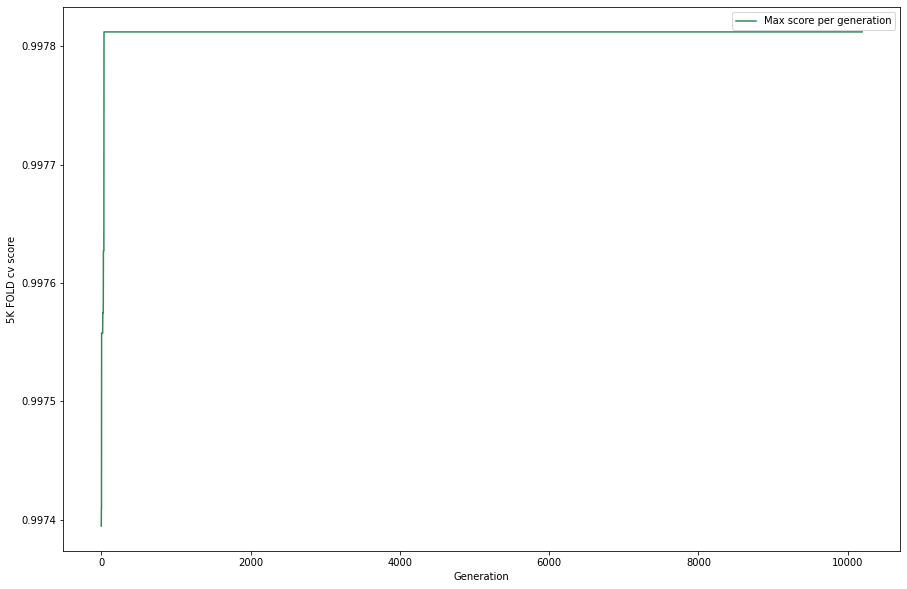

In [33]:
fig = optimizer.plot_generations_scores()
fig.savefig('/content/lasso_ga.pdf')